# CONTOUR MASKING

using [hull of] biggest contour

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def closeCnt(image2close):
    kernel = np.ones((25,25),np.uint8)#cv.getStructuringElement(cv.MORPH_RECT,(10,10)) 
    image2close=cv.morphologyEx(image2close,cv.MORPH_CLOSE,kernel)
    image2close=cv.morphologyEx(image2close,cv.MORPH_RECT,kernel)
    kernel =cv.getStructuringElement(cv.MORPH_RECT,(10,10))
    image2close=cv.dilate(image2close,kernel,iterations=2)
    kernel = np.ones((15,15),np.uint8)
    image2close=cv.morphologyEx(image2close,cv.MORPH_OPEN,kernel)
    return image2close

def roiHud(image2hud,cnt2hud,hull2hud):
    # draw max contour
    cv.drawContours(image2hud, cnt2hud, -1,(25,205,255), 10)
    
    # draw convex hull
    cv.drawContours(image2hud, [hull2hud], -1, (255, 255, 0), 5)

    # rotated rect 
    rect = cv.minAreaRect(cnt2hud)
    box = np.int0(cv.boxPoints(rect))
    cv.drawContours(image2hud, [box], 0, (0,0,255), 8)

    # bounding rect and center
    xR,yR,wR,hR = cv.boundingRect(cnt2hud)
    cv.rectangle(image2hud, (xR,yR), (xR+wR,yR+hR), (255,0,255), 15)

    # rectangle center
    xcR,ycR=xR+wR//2, yR+hR//2
    cv.circle(image2hud, (xcR,ycR), 15, (0,255,0), 18)
    
    return image2hud, (xcR, ycR),(wR,hR)

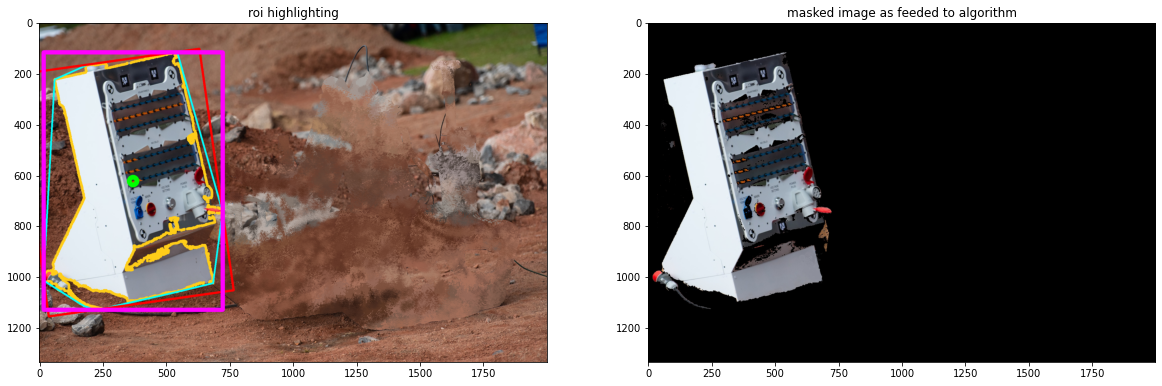

In [2]:
sourceimg=cv.imread('../../images/marsyard/task_new.jpg')
##result of previous code coventiently modified as if robot not present
foreground=cv.imread('../../images/panel/paneltask_real.jpg')
#foreground=bgForeImprov(foreground)

# foreground grayscaling and binarization
imgcnts = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
#imgtrack = cv.threshold(bpMask,10,255,0)#, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
imgcnts[imgcnts<10]=0
imgcnts[imgcnts>=10]=255

#imgcnts=cv.Canny(imgcnts,120,60)
# close max contour
#imgcnts=closeCnt(imgcnts)
# contours
cnts = cv.findContours(imgcnts, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# max contour, hull and hullmask
#maxcnt=max(cnts, key=lambda x: cv.contourArea(x)) #len)
maxcnt=max(cnts, key=len)
hullmax=cv.convexHull(maxcnt)
foreprint=foreground.copy()
hullMask=cv.cvtColor(cv.fillConvexPoly(np.zeros(foreprint.shape,np.uint8),hullmax,255),cv.COLOR_BGR2GRAY)

# masked foreground image
foreprint=cv.bitwise_and(foreprint,foreprint,mask=hullMask)

# image with roi highlight and center
forehud,rco,(wr,hr)=roiHud(sourceimg,maxcnt,hullmax)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(forehud,cv.COLOR_BGR2RGB))
plt.title('roi highlighting')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(foreprint,cv.COLOR_BGR2RGB))
plt.title('masked image as feeded to algorithm')
plt.show()

if 1:
    forehud=cv.imread('../../images/marsyard/task_new.jpg')
    #cv.circle(forehud, (rco), 15, (0,255,0), 18)

# MOTION CONTROL SIMULATION

https://stackoverflow.com/questions/743164/how-to-emulate-a-do-while-loop-in-python



moving


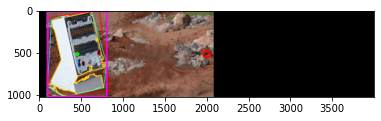

moving


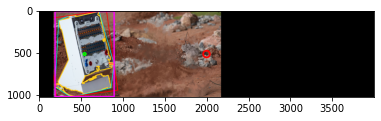

moving


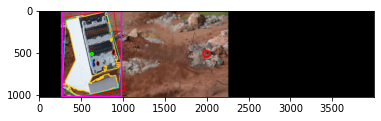

moving


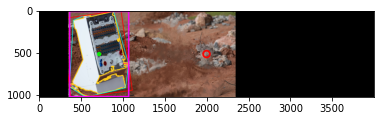

moving


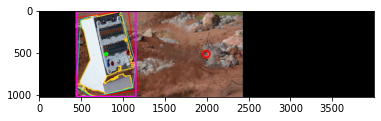

moving


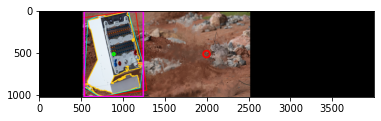

moving


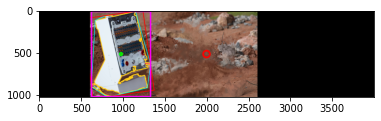

moving


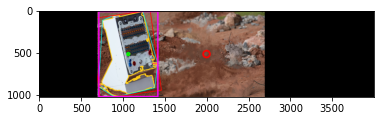

moving


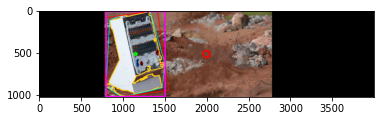

moving


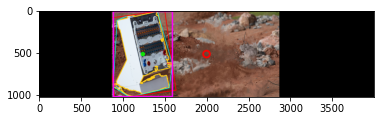

moving


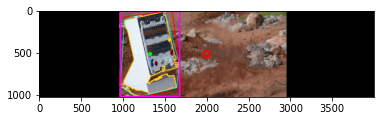

moving


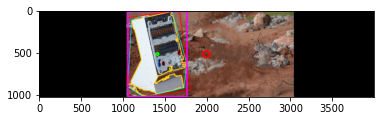

moving


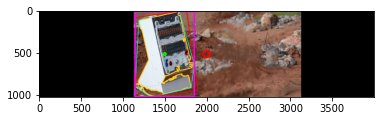

moving


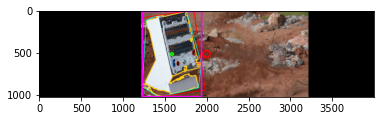

moving


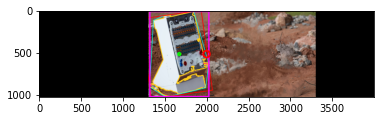

moving


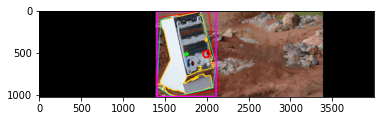

moving


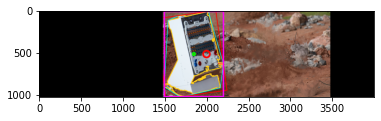

moving


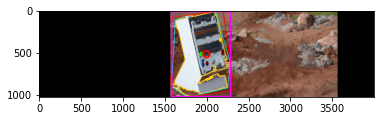

moving


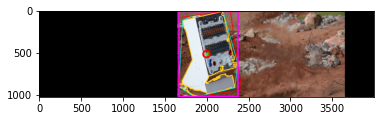

moving


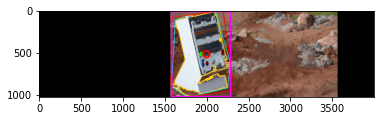

oscilaltions along x!horizontal speed reduction
moving


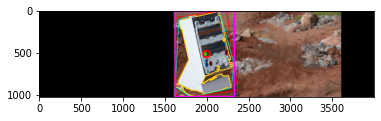

moving


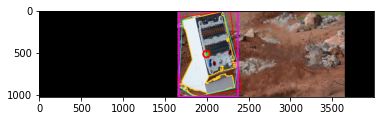

moving


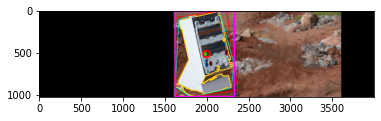

oscilaltions along x!horizontal speed reduction
moving


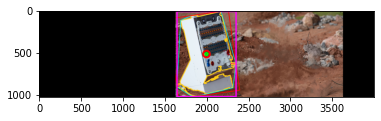

terminating motion along x...
motion terminated


In [7]:
# FOREGROUND
# ROI center in foreground coordinates
rcox,rcoy=rco
# roi dimensions
# wr, hr
##dimensions to construct the fake background
h,w,_=foreground.shape
##center for alignment pourposes, in foreground coord.
co=(w//2,h//2)


# BACKGROUND 
##result of masking the camera POV, big enough to center each possible roi
## height depending on max nearess robot will approach the pannel, as for now: *2
backchan=np.zeros((h*2,w*2),np.uint8)
##3 black channels
background=cv.merge([backchan,backchan,backchan])
# dimensions
H,W,_=background.shape
# center in POV coord.
CO=(W//2,H//2)

# IMAGE CENTERS GEOMETRY
# rcC= rcO-CO=rco+oO-CO
## rcC: POV center-ROI center; to minimize
## rcO: roi center in POV coord.
## CO: background center in POV coord.
## oO: foreground origin in POV coord.

# starting position of foreground in POV camera
##imaging POV camera support similarly moves along vertical axis, random horizontal position
oO=oOx,oOy=0,CO[1]-rcoy

#_add random x position with test on dimension of background and foreground
##_ position will be outside a certaint range around the POV center

##addiotional geometries
# rcO=roO+rcro
## roO: roi origin in POV coord.
## rcro: roi center in ROI coord.== (wr/2,hr/2); const
# roO=roo+oO
## roo: roi origin in FOREGROUND coord.; const
    
# MOTION PARAMETERS
# simulation of robot traverse by moving the image
motx=motx0=87
# motion termination criterion, by roi and POV center distance
epsx=9
# motion dimming test array 
motestx=[0,0,0]

while(1):

    rcO=[sum(jj) for jj in zip(rco, oO)]##increasing
    rcC=rcCx,rcCy=[sum(jj) for jj in zip(CO, np.negative(rcO))]##as convention

    # tracks current and previous distances to find oscillations around POV center
    motestx.append(rcCx)
    motestx.pop(0)
    if motestx[0]*motestx[1]<0 and motestx[0]*motestx[2]>0:
        # traverse action dimming
        motx=motx//2
        print('oscilaltions along x!horizontal speed reduction')
    # motion termination test
    if abs(rcCx)<epsx:
        # set motion action as initial for future requests
        motx=motx0
        print('terminating motion along x...')
        # interrupts action
        break
   
    #else    
    print('moving')
    # motion direction
    if np.sign(rcCx)>0:
        oO=oOx,oOy=oOx+motx,oOy
    else:
        oO=oOx,oOy=oOx-motx,oOy
    #print('rcO:',rcO,'rcC:',rcC,'oO:',oO)
    
    # POV DISPLAY
    # POV creation with current roi position
    backprint=background.copy()
    backprint[oOy:oOy+h,oOx:oOx+w]=forehud
    # POV center marker
    cv.circle(backprint,CO,40,(0,0,255),20)
    plt.imshow(cv.cvtColor(backprint[CO[1]-(hr//2+5):CO[1]+hr//2+5,:],cv.COLOR_BGR2RGB))
    #plt.imshow(backprint[CO[1]-(hr//2+5):CO[1]+hr//2+5,\
     #   min(rcO[0]-wr//2-5,CO[0]-wr//2-5):max(rcO[0]+wr//2+5,CO[0]+wr//2+5)])
    plt.show()

print('motion terminated')

moving
step  0 / 90


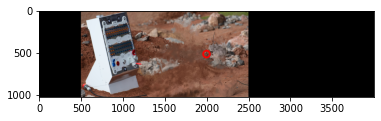

step  1 / 90


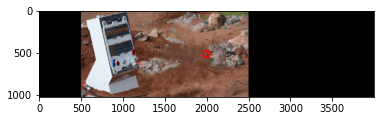

step  2 / 90


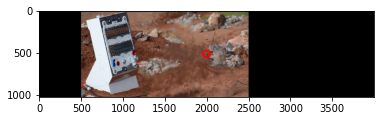

step  3 / 90


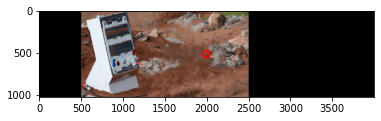

step  4 / 90


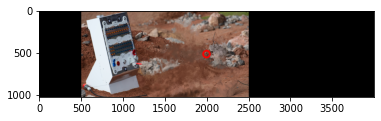

step  5 / 90


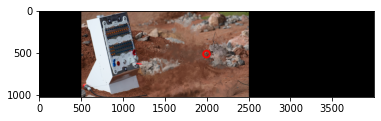

step  6 / 90


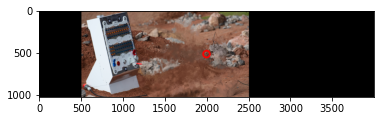

step  7 / 90


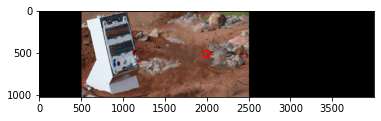

step  8 / 90


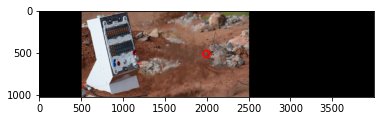

step  9 / 90


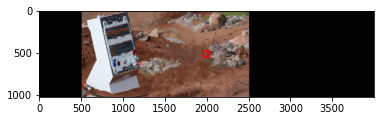

step  10 / 90


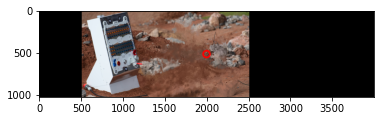

step  11 / 90


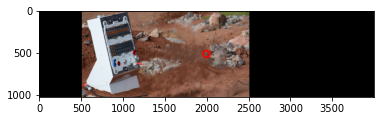

step  12 / 90


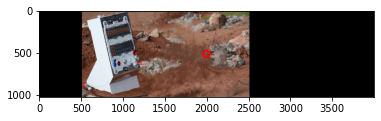

step  13 / 90


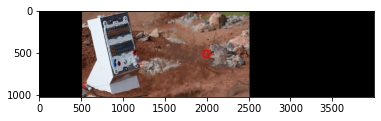

step  14 / 90


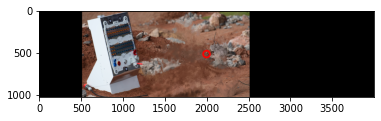

step  15 / 90


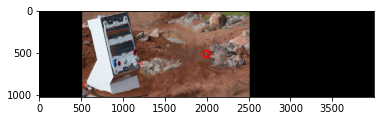

step  16 / 90


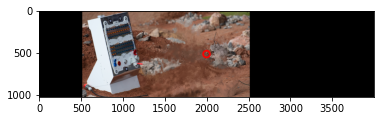

step  17 / 90


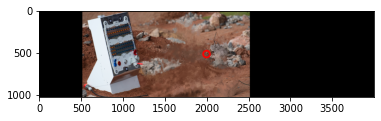

step  18 / 90


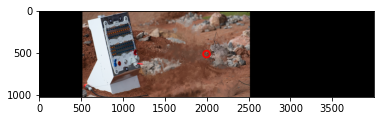

step  19 / 90


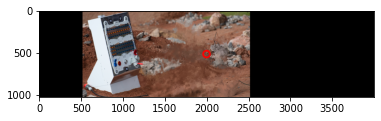

step  20 / 90


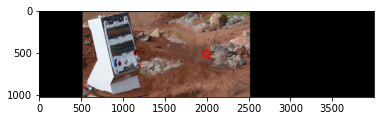

step  21 / 90


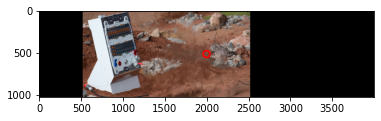

step  22 / 90


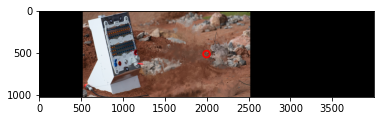

step  23 / 90


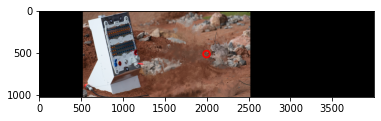

step  24 / 90


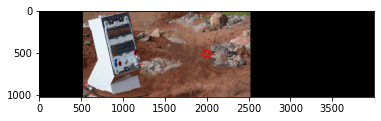

step  25 / 90


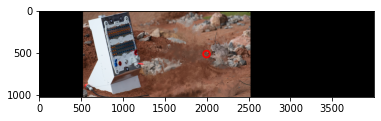

step  26 / 90


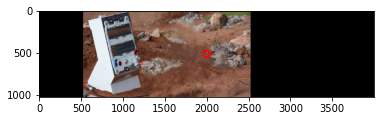

step  27 / 90


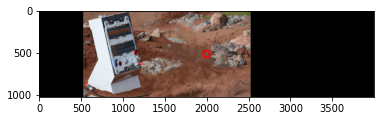

step  28 / 90


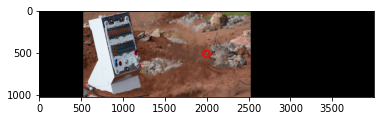

step  29 / 90


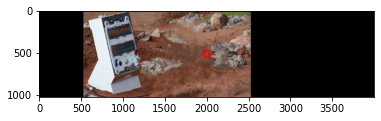

step  30 / 90


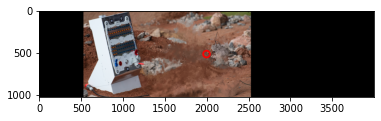

step  31 / 90


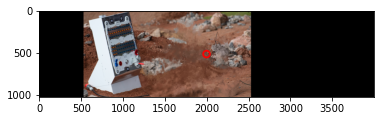

step  32 / 90


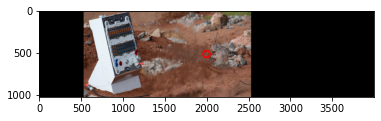

step  33 / 90


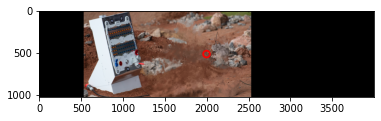

step  34 / 90


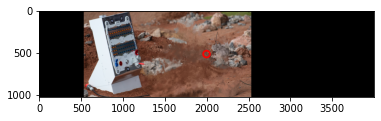

step  35 / 90


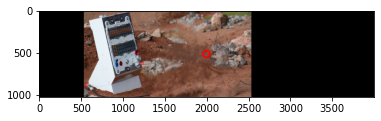

step  36 / 90


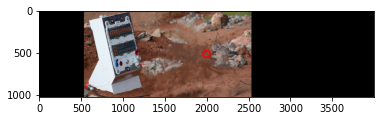

step  37 / 90


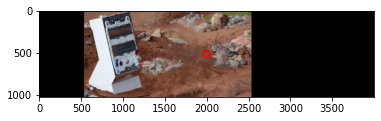

step  38 / 90


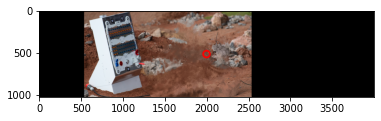

step  39 / 90


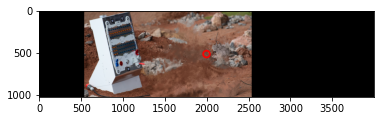

step  40 / 90


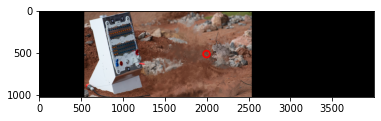

step  41 / 90


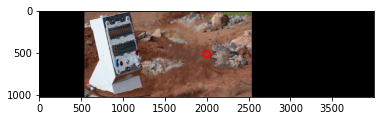

step  42 / 90


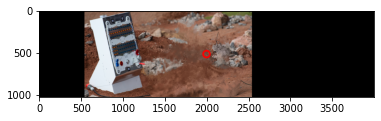

step  43 / 90


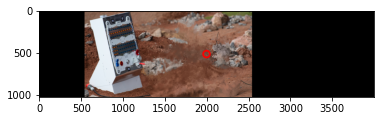

step  44 / 90


KeyboardInterrupt: 

In [15]:
# FOREGROUND
# ROI center in foreground coordinates
rcox,rcoy=rco
# roi dimensions
# wr, hr
##dimensions to construct the fake background
h,w,_=foreground.shape
##center for alignment pourposes, in foreground coord.
co=(w//2,h//2)


# BACKGROUND 
##result of masking the camera POV, big enough to center each possible roi
## height depending on max nearess robot will approach the pannel, as for now: *2
backchan=np.zeros((h*2,w*2),np.uint8)
##3 black channels
background=cv.merge([backchan,backchan,backchan])
# dimensions
H,W,_=background.shape
# center in POV coord.
CO=(W//2,H//2)

# IMAGE CENTERS GEOMETRY
# rcC= rcO-CO=rco+oO-CO
## rcC: POV center-ROI center; to minimize
## rcO: roi center in POV coord.
## CO: background center in POV coord.
## oO: foreground origin in POV coord.

# starting position of foreground in POV camera
##imaging POV camera support similarly moves along vertical axis, random horizontal position
oO=oOx,oOy=500,CO[1]-rcoy
#oO=oOx,oOy=[0],CO[1]-rcoy

#_add random x position with test on dimension of background and foreground
##_ position will be outside a certaint range around the POV center

##addiotional geometries
# rcO=roO+rcro
## roO: roi origin in POV coord.
## rcro: roi center in ROI coord.== (wr/2,hr/2); const
# roO=roo+oO
## roo: roi origin in FOREGROUND coord.; const
    
# MOTION PARAMETERS
# simulation of robot traverse by moving the image
motx=motx0=90
# motion termination criterion, by roi and POV center distance
epsx=9
# motion dimming test array 
motestx=[0,0,0]

while(1):

    rcO=[sum(jj) for jj in zip(rco, oO)]##increasing
    rcC=rcCx,rcCy=[sum(jj) for jj in zip(CO, np.negative(rcO))]##as convention

    # tracks current and previous distances to find oscillations around POV center
    motestx.append(rcCx)
    motestx.pop(0)
    if motestx[0]*motestx[1]<0 and motestx[0]*motestx[2]>0:
        # traverse action dimming
        motx=motx//2
        print('oscilaltions along x!horizontal speed reduction')
    # motion termination test
    if abs(rcCx)<epsx:
        # set motion action as initial for future requests
        motx=motx0
        print('terminating motion along x...')
        # interrupts action
        break
    range
    #else    
    print('moving')
    # motion direction
    stepx=1 # €[1,motx]
    if np.sign(rcCx)>0:
        for count in range(0,motx,stepx):
            print('step ',count,'/',motx)
            oO=oOx,oOy=oOx+stepx,oOy
            backprint=background.copy()
            backprint[oOy:oOy+h,oOx:oOx+w]=forehud
    # POV center marker
            cv.circle(backprint,CO,40,(0,0,255),20)
            plt.imshow(cv.cvtColor(backprint[CO[1]-(hr//2):CO[1]+hr//2,:],cv.COLOR_BGR2RGB))
            #plt.imshow(backprint[CO[1]-(hr//2+5):CO[1]+hr//2+5,\
            #    min(rcO[0]-wr//2-5,CO[0]-wr//2-5):max(rcO[0]+wr//2+5,CO[0]+wr//2+5)])
            plt.show()
    else:
        for count in range(0,motx,stepx):
            print('step ',count,'/',motx)
            oO=oOx,oOy=oOx-stepx,oOy
            backprint=background.copy()
            backprint[oOy:oOy+h,oOx:oOx+w]=forehud
    # POV center marker
            cv.circle(backprint,CO,40,(0,0,255),20)
            plt.imshow(cv.cvtColor(backprint[CO[1]-(hr//2):CO[1]+hr//2,:],cv.COLOR_BGR2RGB))
            #plt.imshow(backprint[CO[1]-(hr//2+5):CO[1]+hr//2+5,\
            #    min(rcO[0]-wr//2-5,CO[0]-wr//2-5):max(rcO[0]+wr//2+5,CO[0]+wr//2+5)])
            plt.show()

print('motion terminated')

In [ ]:
# FOREGROUND
# ROI center in foreground coordinates
rcox,rcoy=rco
# roi dimensions
# wr, hr
##dimensions to construct the fake background
h,w,_=foreground.shape
##center for alignment pourposes, in foreground coord.
co=(w//2,h//2)


# BACKGROUND 
##result of masking the camera POV, big enough to center each possible roi
## height depending on max nearess robot will approach the pannel, as for now: *2
backchan=np.zeros((h*2,w*2),np.uint8)
##3 black channels
background=cv.merge([backchan,backchan,backchan])
# dimensions
H,W,_=background.shape
# center in POV coord.
CO=(W//2,H//2)

# IMAGE CENTERS GEOMETRY
# rcC= rcO-CO=rco+oO-CO
## rcC: POV center-ROI center; to minimize
## rcO: roi center in POV coord.
## CO: background center in POV coord.
## oO: foreground origin in POV coord.

# starting position of foreground in POV camera
##imaging POV camera support similarly moves along vertical axis, random horizontal position
oO=oOx,oOy=500,CO[1]-rcoy
#oO=oOx,oOy=[0],CO[1]-rcoy

#_add random x position with test on dimension of background and foreground
##_ position will be outside a certaint range around the POV center

##addiotional geometries
# rcO=roO+rcro
## roO: roi origin in POV coord.
## rcro: roi center in ROI coord.== (wr/2,hr/2); const
# roO=roo+oO
## roo: roi origin in FOREGROUND coord.; const
    
# MOTION PARAMETERS
# simulation of robot traverse by moving the image
motx=motx0=90
# motion termination criterion, by roi and POV center distance
epsx=9
# motion dimming test array 
motestx=[0,0,0]

# VIDEO RECORDING
video_array = []
video_size = (W,hr)
print('video recording started')
while(1):

    rcO=[sum(jj) for jj in zip(rco, oO)]##increasing
    rcC=rcCx,rcCy=[sum(jj) for jj in zip(CO, np.negative(rcO))]##as convention

    # tracks current and previous distances to find oscillations around POV center
    motestx.append(rcCx)
    motestx.pop(0)
    if motestx[0]*motestx[1]<0 and motestx[0]*motestx[2]>0:
        # traverse action dimming
        motx=motx//2
        print('oscilaltions along x!horizontal speed reduction')
    # motion termination test
    if abs(rcCx)<epsx:
        # set motion action as initial for future requests
        motx=motx0
        print('terminating motion along x...')
        # interrupts action
        break
    range
    #else    
    print('moving')
    # motion direction
    stepx=5 # €[1,motx]
    if np.sign(rcCx)>0:
        for count in range(0,motx,stepx):
            print('step ',count,'/',motx)
            oO=oOx,oOy=oOx+stepx,oOy
            backprint=background.copy()
            backprint[oOy:oOy+h,oOx:oOx+w]=forehud
    # POV center marker
            cv.circle(backprint,CO,40,(0,0,255),20)
            #plt.imshow(cv.cvtColor(backprint[CO[1]-(hr//2):CO[1]+hr//2,:],cv.COLOR_BGR2RGB))
            #plt.imshow(backprint[CO[1]-(hr//2+5):CO[1]+hr//2,\
            #    min(rcO[0]-wr//2-5,CO[0]-wr//2-5):max(rcO[0]+wr//2+5,CO[0]+wr//2+5)])
            #plt.show()
            video_print=backprint[CO[1]-(hr//2):CO[1]+hr//2,:]
            video_array.append(video_print)
    else:
        for count in range(0,motx,stepx):
            print('step ',count,'/',motx)
            oO=oOx,oOy=oOx-stepx,oOy
            backprint=background.copy()
            backprint[oOy:oOy+h,oOx:oOx+w]=forehud
    # POV center marker
            cv.circle(backprint,CO,40,(0,0,255),20)
            #plt.imshow(cv.cvtColor(backprint[CO[1]-(hr//2+5):CO[1]+hr//2+5,:],cv.COLOR_BGR2RGB))
            #plt.imshow(backprint[CO[1]-(hr//2+5):CO[1]+hr//2+5,\
            #    min(rcO[0]-wr//2-5,CO[0]-wr//2-5):max(rcO[0]+wr//2+5,CO[0]+wr//2+5)])
            #plt.show()
            video_print=backprint[CO[1]-(hr//2):CO[1]+hr//2,:]
            video_array.append(video_print)

print('motion terminated')


video_array2=[]
for ii in video_array:
    video_array2.append(ii)
    #video_array2.append(ii)

video_out = cv.VideoWriter('../../images/z_other/video/video_task.avi',cv.VideoWriter_fourcc(*'DIVX'), 15, video_size) 
for ii in range(len(video_array2)):
    video_out.write(video_array2[ii])
video_out.release()

print('video recording terminated')

video recording started
moving
step  0 / 90
step  5 / 90
step  10 / 90
step  15 / 90
step  20 / 90
step  25 / 90
step  30 / 90
step  35 / 90
step  40 / 90
step  45 / 90
step  50 / 90
step  55 / 90
step  60 / 90
step  65 / 90
step  70 / 90
step  75 / 90
step  80 / 90
step  85 / 90
moving
step  0 / 90
step  5 / 90
step  10 / 90
step  15 / 90
step  20 / 90
step  25 / 90
step  30 / 90
step  35 / 90
step  40 / 90
step  45 / 90
step  50 / 90
step  55 / 90
step  60 / 90
step  65 / 90
step  70 / 90
step  75 / 90
step  80 / 90
step  85 / 90
moving
step  0 / 90
step  5 / 90
step  10 / 90
step  15 / 90
step  20 / 90
step  25 / 90
step  30 / 90
step  35 / 90
step  40 / 90
step  45 / 90
step  50 / 90
step  55 / 90
step  60 / 90
step  65 / 90
step  70 / 90


https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

https://pythonexamples.org/python-opencv-cv2-resize-image/

https://stackoverflow.com/questions/4195453/how-to-resize-an-image-with-opencv2-0-and-python2-6



# FOREGROUND TRACKING

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#camshift
#videosrc='../../images/video/notebed.mp4'
#cap = cv.VideoCapture(videosrc)
# setup initial location of window
track_window = (xR+20, yR+20, wR+20, hR+20)
# set up the ROI for tracking
roiR=foreground[yR:yR+hR,xR:xR+wR]
#histroi=np.histogram(roiR,255,[1,256])[0]
roiR=cv.cvtColor(roiR,cv.COLOR_BGR2HSV)
histroi=cv.calcHist([roiR],[0,1], None ,[179,255], [1,180,1,256] ) #equal to:
#histroi=cv.calcHist([cv.cvtColor(foreground,cv.COLOR_BGR2HSV)],[0,1], hullMask ,[179,255], [1,180,1,256] )
cv.normalize(histroi,histroi,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
# backprojection

while(1):
    frame=cv.imread('../../images/marsyard/task.jpg')
    if 1:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],histroi,[0,180],1)
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
        else:
            break
cv.destroyAllWindows()
